In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
# Import Dataset
import pandas as pd
#muat dataset colors
colors_df = pd.read_csv('seasonal_colors.csv')

#display first row each dataset
print(colors_df.head())

               RGB    R    G    B
0  (254, 255, 210)  254  255  210
1  (255, 238, 169)  255  238  169
2  (255, 191, 120)  255  191  120
3   (255, 125, 41)  255  125   41
4  (255, 253, 181)  255  253  181


In [3]:
rgb_values = colors_df[['R', 'G', 'B']].values
rgb_values = rgb_values.reshape(-1, 3)
rgb_values = rgb_values / 255.0

kmeans = KMeans(n_clusters=4, random_state=0).fit(rgb_values)

In [4]:
cluster_labels = kmeans.labels_
colors_df['Cluster'] = cluster_labels

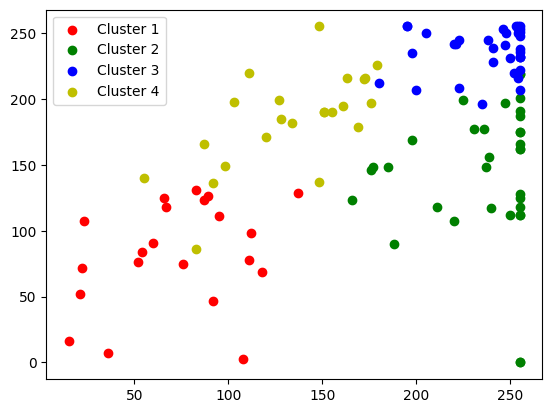

In [5]:
colors = ['r', 'g', 'b', 'y']
for i in range(4):
    cluster_data = colors_df[colors_df['Cluster'] == i][['R', 'G', 'B']].values
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], c=colors[i], label=f'Cluster {i + 1}')
plt.legend()
plt.show()

In [6]:
# Assuming df is your DataFrame and 'Cluster' is the column with the cluster labels
df_with_clusters = colors_df.copy()
df_with_clusters['Cluster'] = cluster_labels

# Display the first 10 rows of the DataFrame with the cluster labels
print(df_with_clusters.head(10))

               RGB    R    G    B  Cluster
0  (254, 255, 210)  254  255  210        2
1  (255, 238, 169)  255  238  169        2
2  (255, 191, 120)  255  191  120        1
3   (255, 125, 41)  255  125   41        1
4  (255, 253, 181)  255  253  181        2
5  (111, 220, 227)  111  220  227        3
6   (92, 136, 196)   92  136  196        3
7    (92, 47, 194)   92   47  194        0
8      (255, 0, 0)  255    0    0        1
9  (255, 162, 127)  255  162  127        1


In [7]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Convert RGB values to colors
colors = [mcolors.to_rgba(rgb) for rgb in rgb_values]

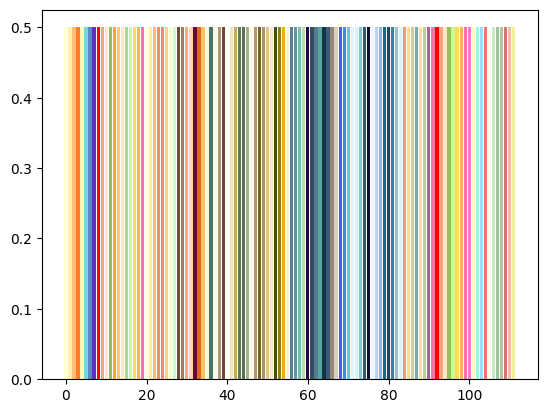

In [8]:
# Create a bar plot with the colors
plt.bar(range(len(rgb_values)), height=0.5, color=colors)
plt.show()

In [9]:
# Extract individual RGB values
colors_df[['R', 'G', 'B']] = colors_df['RGB'].str.extract(r'(\d+), (\d+), (\d+)', expand=True).astype(int)

In [10]:
# Drop the original RGB column
colors_df.drop('RGB', axis=1, inplace=True)

In [12]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(colors_df[['R', 'G', 'B']], colors_df['Cluster'], test_size=0.2, random_state=42)

In [13]:
# Train a random forest classifier on the training data
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [14]:
# Make predictions on the testing data
y_pred = clf.predict(X_test)

In [15]:
# Print the accuracy of the classifier
print("Accuracy:", np.mean(y_pred == y_test))

Accuracy: 0.9565217391304348


In [19]:
# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Print the class labels
print("Class labels:", np.unique(y_test))

Confusion Matrix:
[[5 0 0 0]
 [0 6 0 0]
 [0 0 7 0]
 [1 0 0 4]]
Class labels: [0 1 2 3]
